# Import packages
## this notebook uses some functions that we have not encountered yet
* '_sounddevice_' is a package that lets you access your computer's microphone and speaker.
    > Unfortunately this only works when python is running locally on your computer. <br>
    So we have commented that line of code out (the package does not exist in collaboratory but will be useful when we load python locally on your computer) <br>
    Google collaboratory notebooks cannot access your computer's local environment to communicate with your microphone, etc. Instead of using this package to perform the experiment, for now we will look at the results of data that I collected by doing a simple psychophysical experiment on myself.
* '_matplotlib.pyplot_' and '_seaborn_' are both packages that contain lots of functions for plotting _arrays_ of numbers (such as a waveform recorded via the microphone)
    > https://seaborn.pydata.org/
* '_scipy_' is a 'scientific' package that contains functions for processing arrays of numbers (like filtering them or detecting peaks in a signal). Here we will use it to get a _spectrogram_ of our waveform.
    > https://en.wikipedia.org/wiki/Spectrogram#:~:text=A%20spectrogram%20is%20a%20visual,sonographs%2C%20voiceprints%2C%20or%20voicegrams.
* '_pathlib_' is a package that is used to work with file/directory paths to pass files into and out of functions (such as saving an array to a waveform file on your computer or loading an array from a file)
* '_google.colab_' is a package that contains a module (called _drive_) that enables you to interact with the files in your google drive
* '_IPython.display_' is a package that contains a module ('Audio') to play arrays in the notebook workspace as audio files out of your microphone


In [1]:
import numpy as np
# import sounddevice as sd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from pathlib import Path
from google.colab import drive
from IPython.display import Audio


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# To load the data we will need to connect to your google drive. 
* Remember to make sure that the data from the experiment is uploaded to your Google drive into a folder named '__data_VocalTurnTaking__'. 

To mount Google Drive, run the below code and go to the link to retireve the authorization code. Paste the authorization code in the box created by running the code and press enter.


In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive




Once mounted successfully, your entire Google Drive files should be accessible under /content/gdrive/My\ Drive/
<br>
> After mounting Google Drive, you can download datasets into Google Drive to use in the Colab session, or save outputs of the session into your Google Drive.

> You can also view the contents of your drive directory by expanding the file folder icon to the left.


In [9]:
!ls /content/gdrive/My\ Drive/data_VocalTurnTaking


bout0.npy  Hello.npy  ResponseDouble.npy  ResponseSingle.npy


We will now create a 'pathlib' object that essentially saves the google drive directory as a string that we can pass to 'load' functions.

In [32]:
savepath = Path('/content/gdrive/My Drive/data_VocalTurnTaking/')

# Now that we have access to the data for the experiment, let's explore the experiment and its data.

## Run the following cell to specify some "_metadata_" about the data collected.
> https://en.wikipedia.org/wiki/Metadata

In [4]:
sampleRate = 20000
duration = 3

# Experiment Part I) 
## First, a human 'call' was recorded and played to a human test subject.  

In [34]:
# load the call signal/waveform and store it as a local variable named 'call'
call = np.load(savepath / 'Hello.npy').flatten()

# 'flatten()' changes the shape of the array... 
# not an important detail for now, but something to keep in mind for future debugging

We can play the array using the 'Audio' module. When you run the cell below it crates a graphical interface below the code cell with a play button, a volume slider, and the option to download (unecessary since we already have this audio file stored). 

In [35]:
# Generate a player for mono sound
Audio(call,rate=sampleRate)

### Waveforms/signals can be visualized in several different ways. Let's examine two ways to visualize the call that you just heard:
> (1) as a raw waveform; the units are usually 'Volts.'<br>
> (2) as a '_spectrogram_'; the units are frequency ('Hertz').<br>

Both of these are plotted as a function of time.

The code below creates a time vector to plot the raw waveform against. It contains the same number of points as the 'call' waveform. It starts at time = 0 seconds and ends at time = 3 seconds. It is convension to name this 'xtime' since it will be plotted on the x-axis.

In [36]:
xtime = np.linspace(0, duration, sampleRate * duration) 

We can now use the matplotlib.pyplot function 'plot' to plot the amplitude of the call signal as a function of time.

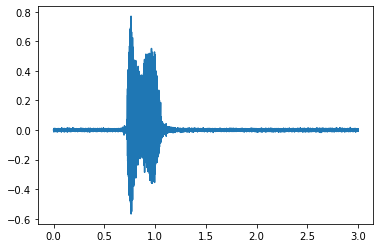

In [37]:
# first, make a figure
hfig = plt.figure()

# The following function takes 'x' and 'y' and plots them:
plt.plot(xtime, call) 
# you can provide other elements to the function
# by adding them inside the parentheses (separated by a comma)

# BELOW is where you will insert functions to add labels to the plot



You can change some of the aesthetic features of the plot by passing arguments to the plot() function. 
> change the color of the line to green by adding ``` color = 'green' ``` to the list of elements passed to the plot function. Try other colors as well. 

You can also add labels to the plot
> Add a line of code to the cell above that uses the ``` plt.xlabel() ``` function to add a label for the x axis describing what is being plotted (time in seconds). <br>
>> use the following syntax: ``` plt.xlabel('time, seconds') ``` <br>

> Do the same for the y label using ``` plt.ylabel() ``` to specify that the amplitude is in Volts. 

Another helpful way to visualize audio signals is to plot a spectrogram. The '_signal_' module that we imported at the beginning of the notebook has a function for calculating the spectrogram of the signal.
> Where specified in the code cell below, add axes labels like you did for the previous plot. (The Y label will be different since this is a plot of frequency against time rather than amplitdue against time).

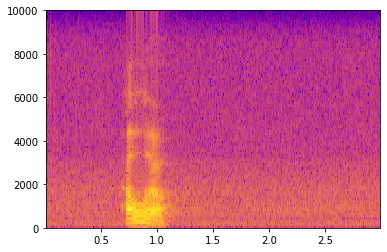

In [38]:
# First we need to specify parameters to input into the spectrogram function:
windur = 0.01 # the duration of each chunk (window) to calculate the power across frequencies
winsamp = int(windur*sampleRate) # transforms the window duration into samples

# next, we use the spectrogram() function to calculate the spectrogram
f, t, Sxx = signal.spectrogram(call,
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
# f is an array of all the frequency bins analyzed
# t is an array of all the time windows analyzed
# Sxx is a matrix of the power at a given frequency in a given time window

# the 'plt' module has a function that plots this kind of 3-dimensional data
plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 

# ADD LABELS FOR THE X AND Y AXES HERE:
# remember, a spectrogram is a plot of frequency across time




# Experiment Part II) 
## Second, the call was played 20 times (20 trials). <br> On each trial, a human test subject responded to the call with a response. <br> The vocalization of the test subject was recorded on each trial and saved as an array. 

In [39]:
# load the matrix of response signals/waveforms and store it as a local variable named 'response_single'
ResponseSingle = np.load(savepath / 'ResponseSingle.npy')

Let's look at the shape of this matrix by using the ``` np.shape() ``` function below.

In [40]:
np.shape(ResponseSingle)

(20, 60000)

This means that the matrix has 20 rows and 60000 columns. Each row is the response on a single trial. Each column is a sample of the amplitude of the signal at each moment in time throughout each trial. 
> The number of samples is equal to the duration of the recording on each trial (3 seconds) multiplied by the sampling rate (20000 Hertz). This metadata was stored as variables earlier and can be used to calculate the expected number of samples in each row of the matrix:

In [41]:
SamplesPerRow = duration * sampleRate
print('Each row should have this many samples: ')
print(SamplesPerRow)

Each row should have this many samples: 
60000


We can look at just one row at a time by assigning a single row to a new variable. <br>
The cell below assigns the first row (index '0') to a variable called 'trial0'.

In [42]:
trial0 = ResponseSingle[0,:]

Using the examples from Part I of the experiment above, create additional code cells below to write code that makes the following plots of the data from the first trial that is saved as the variable '_trial0_':
* 1) Plot the amplitude against time
* 2) Plot the frequency against time for the spectrogram of the signal.

You can even copy and paste most of the code written in Part I into new code cells below and just change the variable for the signal being plotted. The time variable (xtime) that we created before should be the same here.

### Analyzing data from Part II:
> What is some of the important information that we want to find out?
>> One of the main pieces of information that we want to calculate from the response data is the distribution of response latencies (ie. the time between the start of the call and the start of the response).

To calculate this information, we need to first know the onset of the call (in seconds). You can get an approximate estimate of this from looking at the plots you made in Part I.
> Look at the plots you made to write an approximate time of call onset in the Markdown cell below:

To calculate a more exact estimate of the call onset, we will write code that finds when the signal power across frequencies (the absolute magnitude) increases above some threshold value.
> To do this, we will use the spectrogram function to get the power at each frequency at each time. Then, for each moment in time, we will use the ``` np.sum() ``` function to add the power across all frequencies. We will call the result the __call_envelope__.

In [43]:
f, t, Sxx = signal.spectrogram(call,
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )

call_envelope = np.sum(Sxx,0) 
# the '0' element passed to this function specifies to sum across the first element of the Sxx matrix

Now we can plot the call_envelope across time to see what it looks like. Remember that '_t_' (one of the outputs of the spectrogram() function) is a vector of the time values for each sample in call_envelope.

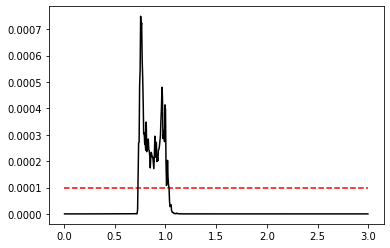

In [44]:
# make the figure
hfig = plt.figure()

# plot the call_envelope against time and color it whatever color you want
plt.plot(t, call_envelope, color = 'black')

# pick a threshold value and 
# plot a horizontal line at that value 
# to see where the call_envelope first goes above that value.
threshold = 0.0001
plt.hlines(threshold, 0, 3, color = 'red', linestyle = '--')

We can ask the computer to calculate when the call_envelope rises above the threshold value. We will call this the 'onset' of the call.
> To do this we first use a comparison operator ``` > ``` (_greater than_) to find where the call_envelope is greater than the threshold value. 

> We also use the '_np.min()_' function to find the earliest time that the call_envelope exceeded the threshold value. 

In [45]:
SortingArray = call_envelope > threshold

Print the _SortingArray_ using the code cell below to see what the information contained in this '_boolean_' array looks like. 
> a 'boolean' is an array of 'True' and 'False'

Next, we will filter the time vector '_t_' using this SortingArray and use the np.min() function to find the earliest time at which the call_evelope is above the threshold value.
> What happens if you pick different threshold values? 

> What happens if you use np.max() instead of np.min()?

In [46]:
TimesAboveThreshold = t[SortingArray]
call_onset = np.min(TimesAboveThreshold)

In [47]:
print('the call onset is at ')
print(call_onset)
print('seconds')

the call onset is at 
0.73
seconds


### Now, that we know the call onset, let's use the same methods to calculate the onset of each response from the test subject
> To do this we will use a "__for loop__" to perform the calculation on each trial of the response matrix.
>> compare the code below to the code you used previously to calculate the call onset. How is this code different? How is it similar? 

In [48]:
# first, we will create an empty array to put the data 
# about the envelope of the response on each trial.
response_envelope_all = []

# next we will loop through the response matrix 
# and calculate the envelope of the response on each trial
# and put that envelope in the matrix using the .append() function.
for response in ResponseSingle:
    f, t, Sxx = signal.spectrogram(response,
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
    response_envelope_this_trial = np.sum(Sxx,0)
    response_envelope_all.append(response_envelope_this_trial)
response_envelope_all = np.asarray(response_envelope_all).T


Now we can plot the response_envelope_all matrix against time to visualize the data. Include a line that shows the threhold value. Notice that without any 'color' argument passed to the plot function, each trial (row of the matrix) is automatically plotted in a different color. 

Text(0.5, 0, 'seconds')

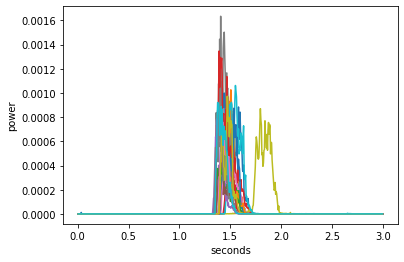

In [49]:
hfig = plt.figure()
plt.plot(t,response_envelope_all);
plt.ylabel('power')
plt.xlabel('seconds')

We will now use a "for loop" to calculate the response onset for each trial using the data in the response_envelope_all matrix that we just created.

In [50]:
response_onset = []
for response in response_envelope_all.T:
  SortingArray = response > threshold
  onset = np.min(t[SortingArray])
  response_onset.append(onset)
response_onset = np.asarray(response_onset).T


 Now we have an array of the response time (in seconds) on each trial, which you can see by printing the array below.

In [51]:
print(response_onset)

[1.45  1.4   1.39  1.445 1.335 1.37  1.415 1.35  1.73  1.455 1.405 1.4
 1.355 1.36  1.34  1.37  1.385 1.345 1.395 1.355]


How would you calculate the response latency on each trial? 
> First, use the Markdown cell below to write in words the calculation that needs to be done.

> Second, use the Code cell below that to write code that performs the calculation and displays the result.
>> use the variable ``` response_latency ``` to store the result

We can plot the call_envelope and the response_envelope overlaid on the same plot in order to visualize and make an estimate of the approximate response latency to the call that should have been calculated above.
* call_envelope is plotted in _red_ and response_envelope_all trials are plotted in _black_

Text(0, 0.5, 'power')

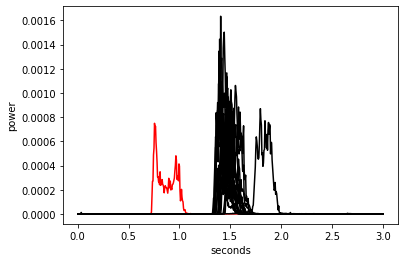

In [52]:
plt.figure()
plt.plot(t,call_envelope,color = 'red')
plt.plot(t,response_envelope_all,color = 'black');
plt.xlabel('seconds')
plt.ylabel('power')

### We want to get a sense of the _distribution_ of response latencies. <br>
One way to do this is to plot a __histogram__. https://en.wikipedia.org/wiki/Histogram

Below, we will calculate and plot a histogram of the values stored in the variable '_response_latencies_' that you created above. <br>
_matplotlib.pyplot_ has a function for plotting histograms: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html <br>
> This function can take an array of data and a specific number of bins to sort the data into. (As you can see in the documentation, there are many other options for this function, but these are the only two we will look at for now).

(array([9., 6., 3., 1., 0., 0., 0., 0., 0., 1.]),
 array([0.605 , 0.6445, 0.684 , 0.7235, 0.763 , 0.8025, 0.842 , 0.8815,
        0.921 , 0.9605, 1.    ]),
 <a list of 10 Patch objects>)

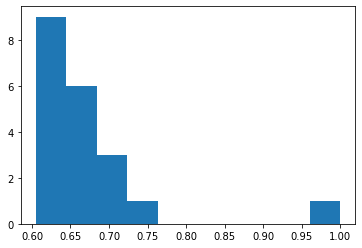

In [53]:
number_of_bins = 10
plt.figure()
plt.hist(response_latency, number_of_bins);

# ADD appropriate x and y axis labels into the functions below.
plt.ylabel()
plt.xlabel()


Change the value assigned to the number_of_bins variable and re-run the cell to observe how the number of bins effects the resulting plot. <br>

Another type of plot is called a '_kernel density estimate_' (abbreviated 'KDE'). This is essentially a smoothed histogram. 'Seaborn' is a package that provides nice functions for visualizing KDE plots. 

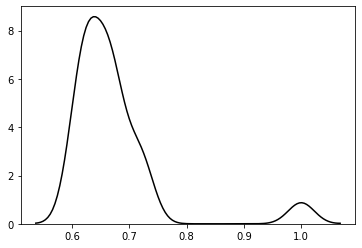

In [55]:
hfig = plt.figure()
sns.kdeplot(response_latency,color = 'black');

The peak of this function is at the mean response latency. 

The mean response latency is calculated using the np.mean() function on your 'response_latency' array.

In [56]:
mean_response_latency = np.mean(response_latency)
print('the mean response latency is:')
print(mean_response_latency)

the mean response latency is:
0.6725


What happens if you use the ``` np.median() ``` function instead?

In [59]:
median_response_latency = np.median(response_latency)
print('the median response latency is:')
print(median_response_latency)

the median response latency is:
0.6575


We can add in a vertical line to plot the calculated mean and median response latency using the plt.vlines() function.

<Figure size 432x288 with 0 Axes>

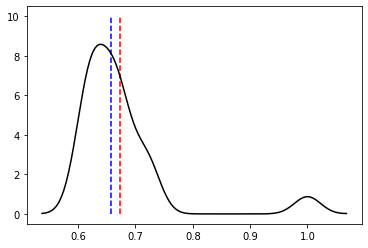

In [60]:
plt.figure()
hfig = plt.figure()
sns.kdeplot(response_latency,color = 'black');

# at the mean response latency, we will now plot a dashed vertical line 
# that goes from y = 0 to y = 10 and has the color red:
plt.vlines(mean_response_latency,0,10, color = 'red', linestyle = '--')

# at the median response latency, we will now plot a dashed vertical line 
# that goes from y = 0 to y = 10 and has the color blue:
plt.vlines(median_response_latency,0,10, color = 'blue', linestyle = '--')

Which line is closer to the peak? 

# Experiment Part III)
## Now that we know the mean response latency, we can play a call at that time to 'jam' the response of the test subject. We will play this 'jamming call' and record the response of a test subject again on each of 20 trials. _However_, we will also make 3 of these trials __catch trials__ in which only the first call and not the jamming call is played. We can then compare the response latency of the test subject to these catch trials to the response latency of the test subject to normal 'single call' trials (calculated above) and 'jamming call' triasl (calculated on jamming trials below)

In [61]:
# the following code adds padding to the onset of the call waveform used in Part II
# so that the call occurs at the mean response latency of the test subject.
padlen = int(np.mean(response_latency)*sampleRate)
jamming_call = np.concatenate([np.zeros(padlen),call[0:-padlen]])

Now we can plot the call and the jamming call on the same plot to compare their timing and what they each look like.

Text(0, 0.5, 'Volts')

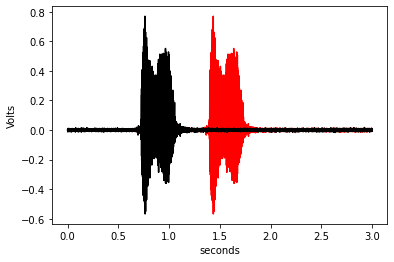

In [64]:
plt.figure()
plt.plot(xtime,jamming_call,color = 'red')
plt.plot(xtime,call,color = 'black')
plt.xlabel('seconds')
plt.ylabel('Volts')

The jamming call should look just like the call, but offset in time.

Now, we can add these two signals together into a single waveform to use on our jamming trials. 

In [65]:
jamming_trial = jamming_call + call
catch_trial = call

What do these trials sound like? Run each code cell below to create an audio player gui for each waveform so that you can listen to each.

In [66]:
# Generate a player for the jamming trial
Audio(jamming_trial,rate=sampleRate)

In [67]:
# Generate a player for the jamming trial
Audio(catch_trial,rate=sampleRate)

Let's look at the spectrogram of the jamming trial. Compare this with the spectrogram of the call that you plotted earlier.

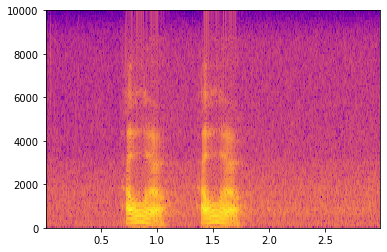

In [69]:
# We use the spectrogram() function to calculate the spectrogram
f, t, Sxx = signal.spectrogram(jamming_trial,
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
# f is an array of all the frequency bins analyzed
# t is an array of all the time windows analyzed
# Sxx is a matrix of the power at a given frequency in a given time window

# the 'plt' module has a function that plots this kind of 3-dimensional data
plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 


Now, let's calcualte the envelope for the jamming trial and plot it.

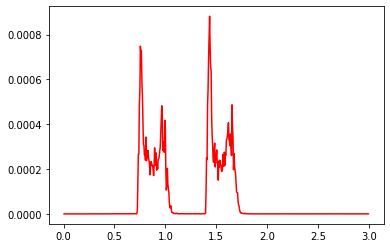

In [72]:
f, t, Sxx = signal.spectrogram(jamming_trial.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
jamming_trial_envelope = np.sum(Sxx,0)

plt.figure()
plt.plot(t,jamming_trial_envelope, color = 'red')

The test subject will respond to 20 trials. 

All of the trials will be jamming trials except for 3 catch trials. 

The catch trials will be trial numbers 10, 15, and 16. 

Let's load the responses of the test subject that were recorded on each of these 20 trials.

In [73]:
# load the matrix of response signals/waveforms and store it as a local variable named 'ResponseDouble'
ResponseDouble = np.load(savepath / 'ResponseDouble.npy')

As we have done before, let's calculate the response_envelope for each trial and use this to find the response onset for each trial

In [77]:
response_envelope = []
for r in np.asarray(ResponseDouble):
    f, t, Sxx = signal.spectrogram(r,
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
    response_envelope.append(np.sum(Sxx,0))
response_envelope = np.asarray(response_envelope).T

response_onset = []
for r in response_envelope.T:
    response_onset.append(np.min(t[r>threshold]))
response_onset = np.asarray(response_onset).T


The call onset is the same for these jamming trials as it was for the call trials. So we have all of the data we need to calculate the repsonse latency for these trials.


# To be continued....